# MPH Thesis Scribbles

## The Climate II

---

Explored one year of Kent County AQI data, granularized by air pollutant type at the daily level.

Concatenated data from 1999-2023 into a single dataset, 'daily_aqi_data_1999_to_2023.csv'

** Data sourced from https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report

In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
from sklearn import preprocessing
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\ljens\\OneDrive\\Documents\\MSU MPH\\capstone\\AQI\\aqidaily1999.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25
0,1999-01-01,8,PM10,GR-MONROE,26-081-0020,AQS,5,.,8,.
1,1999-01-02,26,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,3,26
2,1999-01-03,23,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,2,23
3,1999-01-04,6,CO,GR-MONROE,26-081-0020,AQS,6,.,3,.
4,1999-01-05,8,PM10,GR-MONROE,26-081-0020,AQS,7,.,8,.


In [5]:
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Year'] = df['Date'].apply(lambda x: x.year)

In [6]:
df

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,Month,Year
0,1999-01-01,8,PM10,GR-MONROE,26-081-0020,AQS,5,.,8,.,1,1999
1,1999-01-02,26,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,3,26,1,1999
2,1999-01-03,23,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,2,23,1,1999
3,1999-01-04,6,CO,GR-MONROE,26-081-0020,AQS,6,.,3,.,1,1999
4,1999-01-05,8,PM10,GR-MONROE,26-081-0020,AQS,7,.,8,.,1,1999
...,...,...,...,...,...,...,...,...,...,...,...,...
359,1999-12-27,17,PM2.5,GR-MONROE,26-081-0020,AQS,7,.,.,17,12,1999
360,1999-12-28,34,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,.,34,12,1999
361,1999-12-29,41,PM2.5,GR-MONROE,26-081-0020,AQS,7,.,.,41,12,1999
362,1999-12-30,25,PM2.5,GR-MONROE,26-081-0020,AQS,8,.,.,25,12,1999


In [7]:
from epiweeks import Week

In [8]:
df['Week'] = df['Date'].apply(lambda x: Week.fromdate(x))

In [9]:
df.head()

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,Month,Year,Week
0,1999-01-01,8,PM10,GR-MONROE,26-081-0020,AQS,5,.,8,.,1,1999,199852
1,1999-01-02,26,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,3,26,1,1999,199852
2,1999-01-03,23,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,2,23,1,1999,199901
3,1999-01-04,6,CO,GR-MONROE,26-081-0020,AQS,6,.,3,.,1,1999,199901
4,1999-01-05,8,PM10,GR-MONROE,26-081-0020,AQS,7,.,8,.,1,1999,199901


In [10]:
df.groupby('Week')['Overall AQI Value'].mean()

Week
199852     17.000000
199901     31.714286
199902     53.000000
199903     68.714286
199904     63.142857
199905     55.857143
199906     45.857143
199907     42.000000
199908     68.000000
199909     34.142857
199910     39.714286
199911     42.285714
199912     39.428571
199913     71.428571
199914     49.142857
199915     45.857143
199916     47.857143
199917     51.857143
199918     73.142857
199919     58.571429
199920     65.714286
199921     79.142857
199922     90.142857
199923    123.000000
199924     49.857143
199925    129.142857
199926     69.142857
199927     63.000000
199928    105.142857
199929     68.857143
199930     96.142857
199931     41.000000
199932     43.428571
199933     44.428571
199934     76.000000
199935    112.571429
199936     53.714286
199937     42.142857
199938     47.285714
199939     49.714286
199940     40.285714
199941     48.571429
199942     27.428571
199943     57.285714
199944     49.000000
199945     69.500000
199946     39.714286
199947  

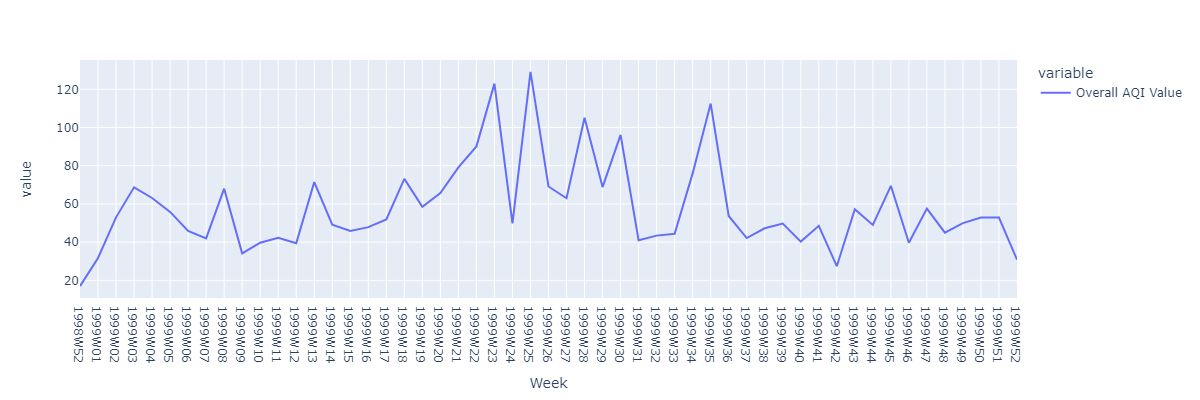

In [30]:
px.line(df.groupby('Week')['Overall AQI Value'].mean(), width=1200, height=400).show('png', )

In [12]:
df.groupby(['Year','Month'])['Overall AQI Value'].mean()

Year  Month
1999  1        51.354839
      2        52.857143
      3        41.774194
      4        51.233333
      5        73.774194
      6        92.300000
      7        81.322581
      8        50.064516
      9        65.666667
      10       42.806452
      11       51.103448
      12       47.967742
Name: Overall AQI Value, dtype: float64

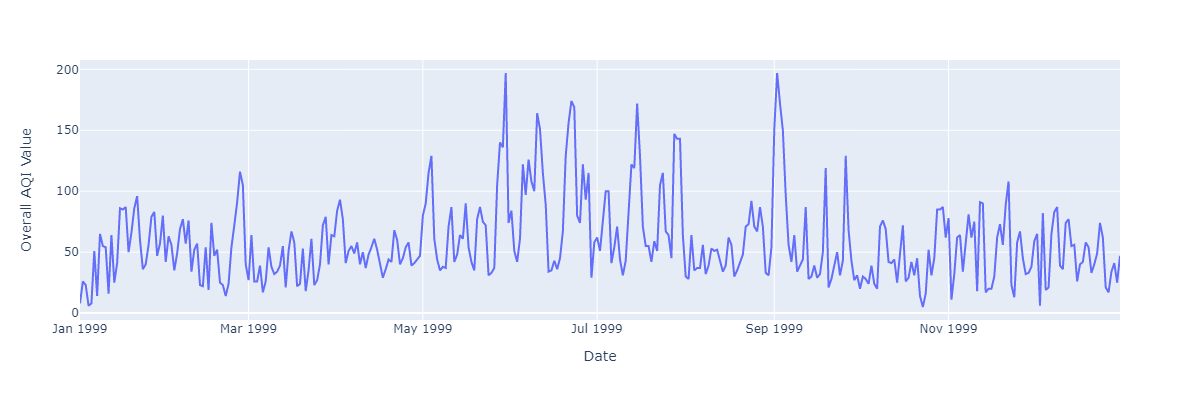

In [31]:
px.line(df, x='Date',y='Overall AQI Value', width=1200, height=400).show('png')

In [14]:
df['Ozone'] = df['Ozone'].apply(lambda x: 0 if x == '.' else int(x))

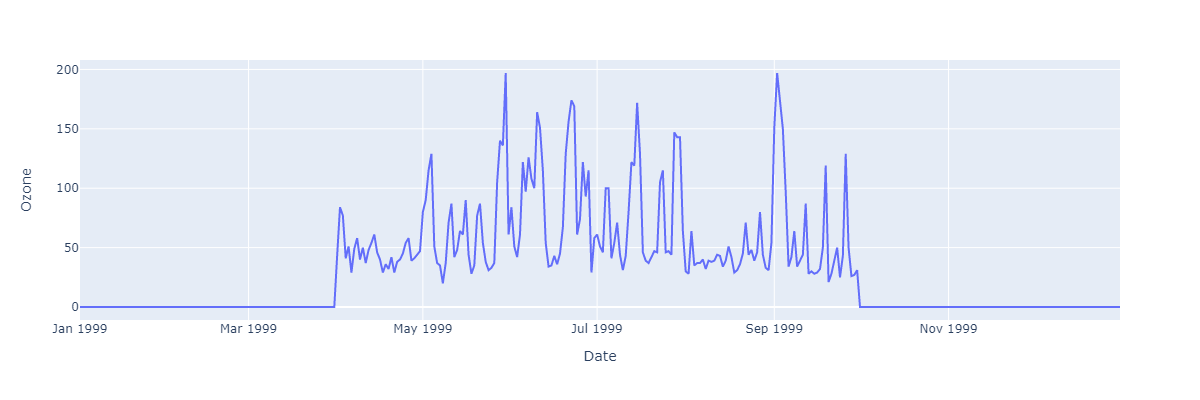

In [32]:
px.line(df, x='Date',y='Ozone', width=1200, height=400).show('png')

In [16]:
df.columns

Index(['Date', 'Overall AQI Value', 'Main Pollutant',
       'Site Name (of Overall AQI)', 'Site ID (of Overall AQI)',
       'Source (of Overall AQI)', 'CO', 'Ozone', 'PM10', 'PM25', 'Month',
       'Year', 'Week'],
      dtype='object')

In [17]:
for col in ['PM10','PM25']:
    df[col] = df[col].apply(lambda x: 0 if x =='.' else int(x))

In [18]:
df['PM10']

0      8
1      3
2      2
3      3
4      8
      ..
359    0
360    0
361    0
362    0
363    0
Name: PM10, Length: 364, dtype: int64

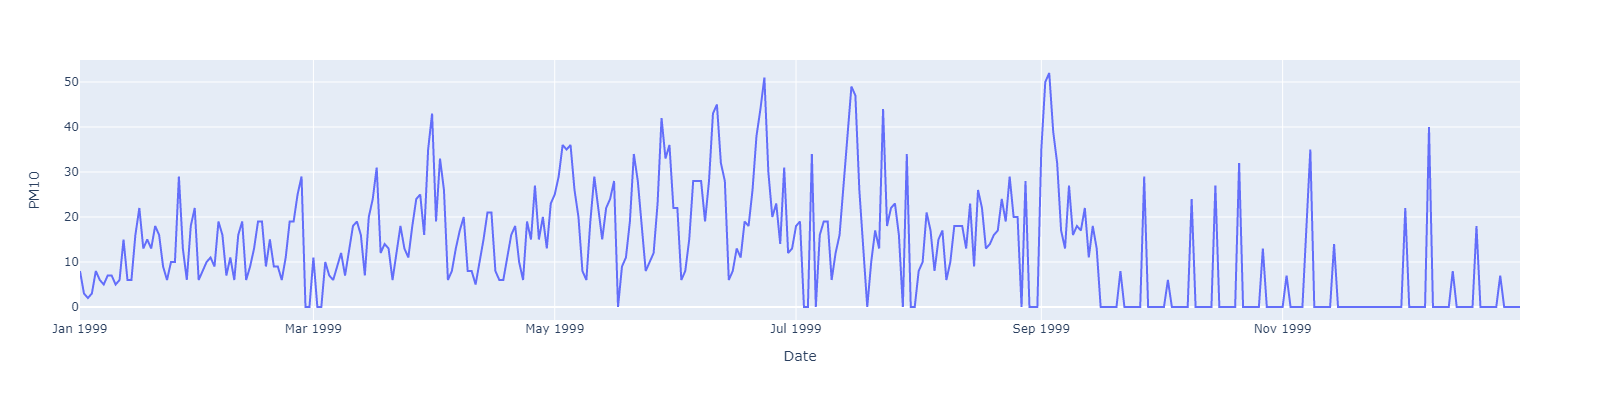

In [34]:
px.line(df, x='Date',y='PM10', width=1600, height=400).show('png')

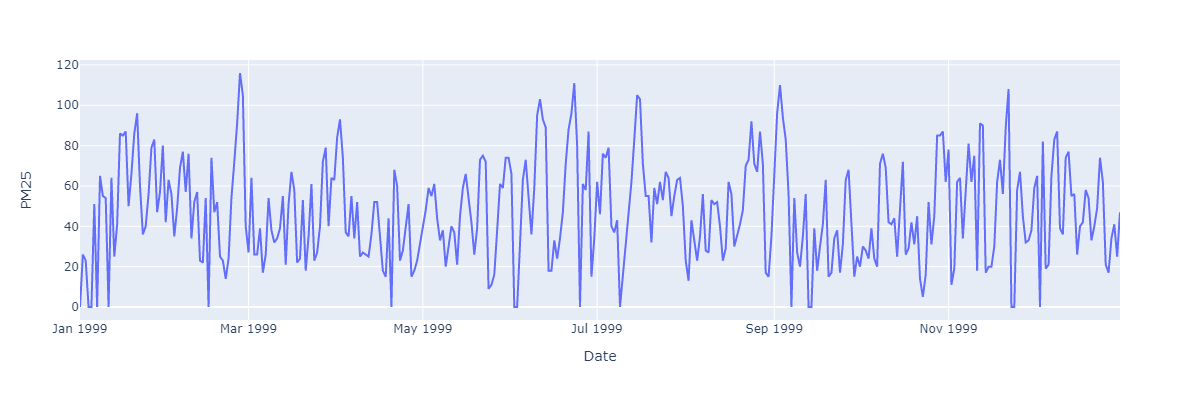

In [35]:
px.line(df, x='Date',y='PM25', width=1200, height=400).show('png')

In [22]:
data = pd.concat([pd.read_csv("c:\\Users\\ljens\\OneDrive\\Documents\\MSU MPH\\capstone\\AQI\\aqidaily" + str(i) + ".csv") for i in range(1999,2024)])

In [23]:
data

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,01/01/1999,8,PM10,GR-MONROE,26-081-0020,AQS,5,.,8,.,NaN
1,01/02/1999,26,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,3,26,NaN
2,01/03/1999,23,PM2.5,GR-MONROE,26-081-0020,AQS,6,.,2,23,NaN
3,01/04/1999,6,CO,GR-MONROE,26-081-0020,AQS,6,.,3,.,NaN
4,01/05/1999,8,PM10,GR-MONROE,26-081-0020,AQS,7,.,8,.,NaN
...,...,...,...,...,...,...,...,...,...,...,...
251,09/09/2023,48,PM2.5,GR-MONROE,26-081-0020,AirNow,.,36,16,48,.
252,09/10/2023,52,PM2.5,GR-MONROE,26-081-0020,AirNow,.,41,17,52,.
253,09/11/2023,35,PM2.5,GR-MONROE,26-081-0020,AirNow,.,22,13,35,.
254,09/12/2023,22,Ozone,GR-MONROE,26-081-0020,AirNow,.,22,8,20,.


In [24]:
data = data.reset_index()

In [25]:
for col in ['Ozone','PM10','PM25','NO2']:
    data[col] = data[col].apply(lambda x: 0 if x == '.' else '-' if pd.notnull(x) == False else int(x))

In [26]:
data.head()

,index,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,0,01/01/1999,8,PM10,GR-MONROE,26-081-0020,AQS,5,0,8,0,-
1,1,01/02/1999,26,PM2.5,GR-MONROE,26-081-0020,AQS,6,0,3,26,-
2,2,01/03/1999,23,PM2.5,GR-MONROE,26-081-0020,AQS,6,0,2,23,-
3,3,01/04/1999,6,CO,GR-MONROE,26-081-0020,AQS,6,0,3,0,-
4,4,01/05/1999,8,PM10,GR-MONROE,26-081-0020,AQS,7,0,8,0,-


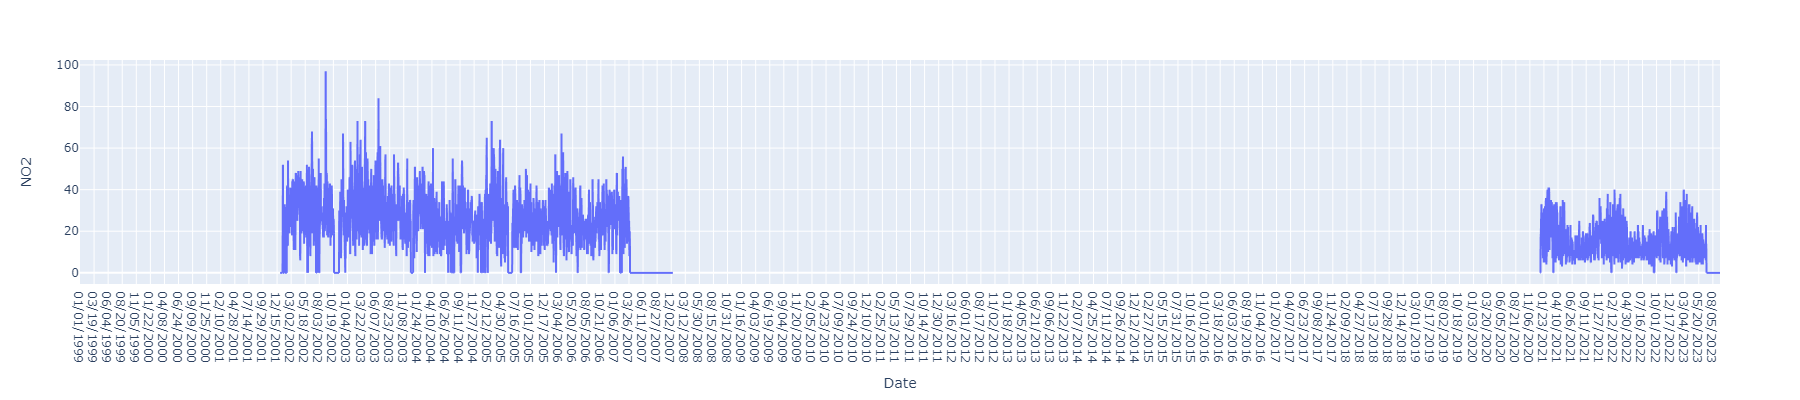

In [36]:
px.line(data, x='Date',y='NO2', width=1800, height=400).show('png')

In [28]:
data.to_csv('daily_aqi_data_1999_to_2023.csv')